# Práctica 2: Aprendizaje automático no supervisado

El objetivo de esta práctica es aplicar algunos algoritmos de aprendizaje automático no supervisado disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjunto de datos e interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 11__

__Nombres de los estudiantes: Alejandro Barrachina Argudo y Jaime Benedí Galdeano__

In [2]:
# acceso a google drive

# from google.colab import drive
# drive.mount('/content/drive')

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `housing.csv` que se proporciona junto con la práctica.
Antes de nada, elimina las filas con valores nulos.



In [3]:
import sys

!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scikit-learn

"c:\Program" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"c:\Program" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"c:\Program" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"c:\Program" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"c:\Program" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./housing.csv')
df = df.dropna()
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20433 rows x 10 columns]

## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [5]:
desc= df.describe()
desc

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206864.413155  
std         115435.667099  
min          14999.000000  
25%         119500.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

De los datos, realizamos las siguientes observaciones:

- Asumimos los datos de longitud y latitud medidos en grados decimales.
- Asumimos la edad media de la casa en un bloque medida en años.
- Asumimos el sueldo medio por unidad familiar en dólares estadounidenses($)
- Asumimos el valor de las casas medio en dólares estadounidenses($)

#### Longitudes y latitudes

Respecto a las longitudes y latitudes, tienen desviaciones estándar numéricamente pequeñas. Sin embargo, dado que hablamos de coordenadas geográficas, espacialmente da a enterder que son datos relativamente cercanos pertenecientes a una región extensa.

De hecho, si disponemos en un gráfico las latitudes y longitudes, y gracias que sabemos que los precios están medidos en dólares estadounidenses, veremos que resulta muy probable que estemos trabajando con inmuebles procedientes del estado de California.

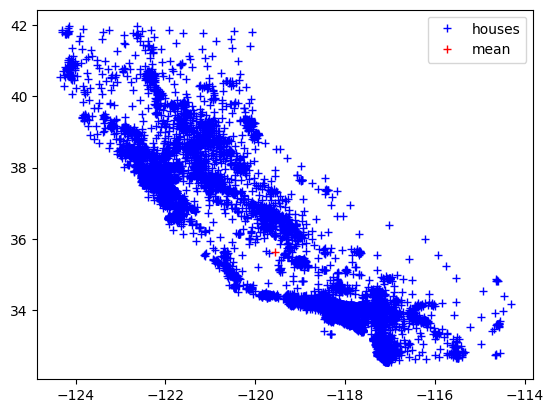

In [6]:
# Montamos las coordenadas de las casas
plt.plot(df.values[:,0], df.values[:,1], "b+")
# Mostramos la posición geográfica media
plt.plot(desc.values[1][0], desc.values[1][1], "r+")
plt.legend(labels=['houses', 'mean'])

Esta teoría explicaría la distribución de los cuartiles de las coordenadas respecto al número total de casas. En las longitudes, las fronteras entre el segundo y tercer cuartil están muy muy cercanas, dando a entender que entorno a la longitud -118 hay una gran concetración de datos. Geográficamente esto coincidiría con la ciudad más pobladad del estado: Los Ángeles. Este razonamiento es equivalente con el primer y segundo cuartil de las latitudes, coincidente con las coordenadas supuestas para la ciudad de los Ángeles.

<Axes: >

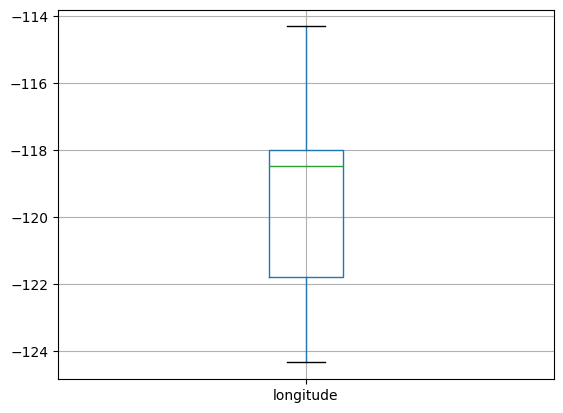

In [7]:
df.boxplot(column=['longitude'])

<Axes: >

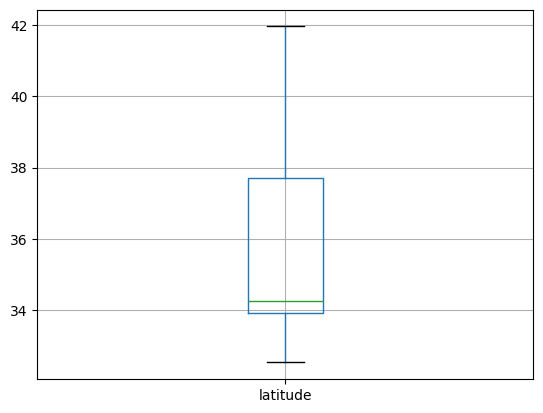

In [8]:
df.boxplot(column=['latitude'])

La media correspondería aproximadamente con las coordenadas de la ciudad de Bakersfield, dato no relevante más allá de estar lejos de ocupar el centro geográfico del estado debido a la cuantía de datos en la ciudad de los Ángeles.

El hecho de que ambas variables de longitud y latitud estén centradas en una zona relativamente concreta a la frontera política de California, explica como ni los datos mínimos ni máximos son considerables outliers, puesto que espacialmente no tendría sentido añadir inmuebles de fuera de la zona de análisis.

#### Edad media del inmueble

Respecto a la edad, tendría sentido hacer un análisis aislado de la variable, dado lo diferente que es su unidad de medida respecto al resto.

Dado que dos casas pueden tener la misma edad, nos interesaría saber la distribución de edades entre toda la muestra de las casas. Para eso, creamos un histograma que nos enseñe las distribuciones absolutas de los valores.

(array([ 713., 1095., 2213., 2659., 2486., 2322., 3525., 1873., 1598.,
        1949.]),
 array([ 1. ,  6.1, 11.2, 16.3, 21.4, 26.5, 31.6, 36.7, 41.8, 46.9, 52. ]),
 <BarContainer object of 10 artists>)

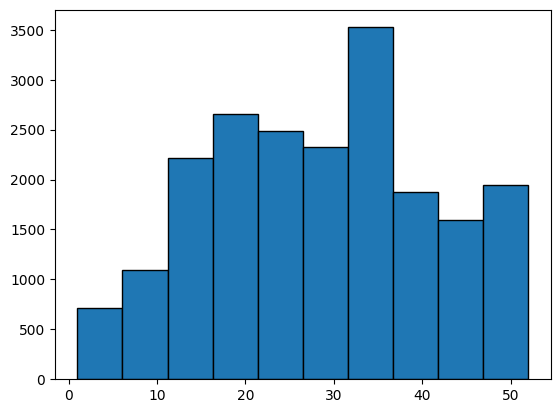

In [9]:
plt.clf()
plt.hist(df.values[:,2], histtype='bar', ec='black')

Observamos con mejor precisión visual la distribución de edades entre los inmuebles. El rango de edades se extiende, según el descriptor, entre 1 año (asumimos inmueble de nueva construcción) dado por el campo "mínimo", y los 52 años. El histograma realiza agrupaciones de datos en intervalos iguales de 5.1 años, puesto que resulta poco intuitivo realizar cálculos con valores de edades que apenas se repiten.

Observamos una moda en el intervalo [31.6, 36.7), lo que nos daría un dato modal de =

-   31.6 + (1873/(2322 + 1873)) * 5.1 = 33.8771 años

Los datos principalmente se concentran entre los 11.2 y los 36.7 años. Es un intervalo amplio y asumiremos que los datos acabarán estando muy dispersos. Además, la desviación típica está fijada alrededor de una década respecto a la media.

#### Numero de salas y habitaciones

Text(0.5, 0, 'total_rooms')

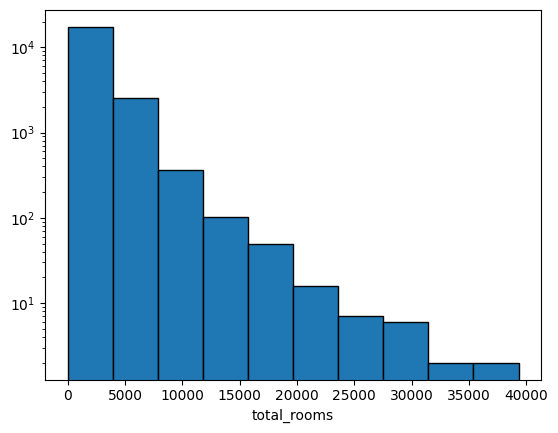

In [10]:
plt.clf()
analisis_valores = df.values
plt.hist(analisis_valores[:,3], log=True, histtype='bar', ec='black')
plt.xlabel(df.columns[3])

Text(0.5, 0, 'total_bedrooms')

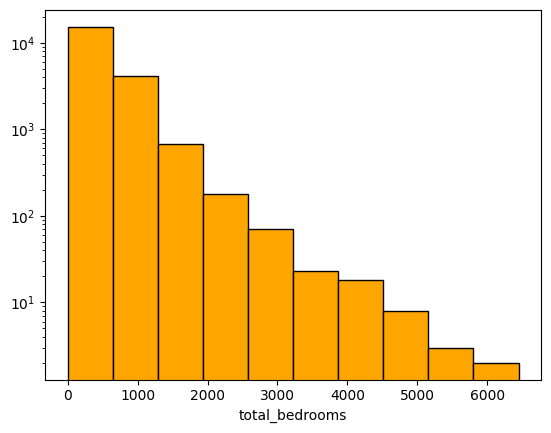

In [11]:
plt.clf()
plt.hist(analisis_valores[:, 4], log=True, color="orange", histtype='bar', ec='black')
plt.xlabel(df.columns[4])

Realizando pruebas con estas distribuciones, vimos que era necesario presentar los datos en escala logarítmica dado que, si no, no se entendían bien. Técnicamente están ambas en las mismas unidades: número de salas o habitaciones, número de casas con ese número de salas o habitaciones.

A pesar de la diferencia en escala, observamos que son dos distribuciones muy parecidas. Tal es así, que al relacionarlas observamos una relación clara.

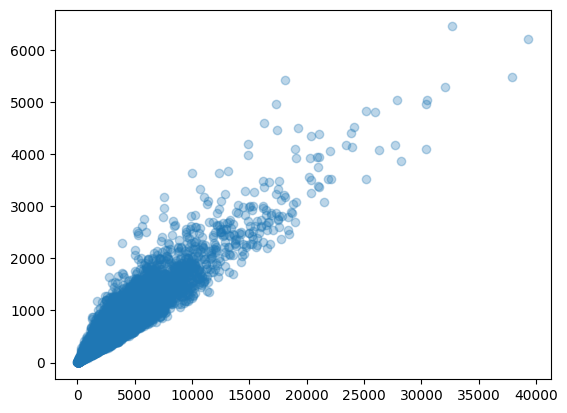

In [12]:
plt.scatter(analisis_valores[:,3], analisis_valores[:,4], alpha=0.3)

#### Poblaciones

Text(0.5, 0, 'population')

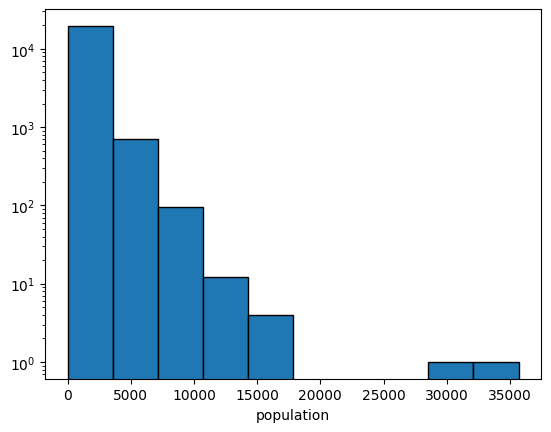

In [13]:
plt.hist(df.values[:,5], log=True, histtype='bar', ec='black')
plt.xlabel(df.columns[5])

Observamos en la variable población una diferencia exponencial entre poblaciones pequeñas y grandes, denotando la prácicamente nula existencia de valores en intervalos entre valores de 20000 y 25000

Text(0.5, 0, 'households')

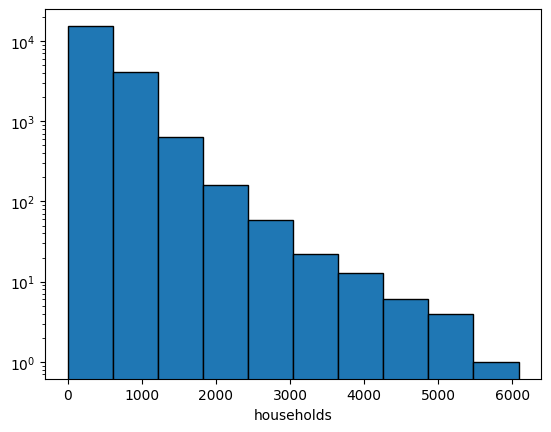

In [14]:
plt.hist(df.values[:,6], log=True, histtype='bar', ec='black')
plt.xlabel(df.columns[6])

Al igual que pasaba antes, hemos tenido que presentar el histograma en escala logarítmica para entender los datos. Observamos que son más comunes las viviendas donde pueden vivir menos personas que grandes edificios de apartamentos, algo normalmente asociado al modelo urbanístico estadounidense.

#### k

Text(0.5, 0, 'median_income')

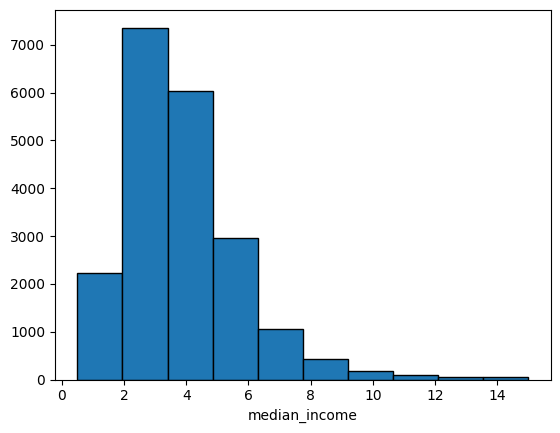

In [15]:
plt.hist(df.values[:,7], histtype='bar', ec='black')
plt.xlabel(df.columns[7])

Text(0.5, 0, 'median_house_value')

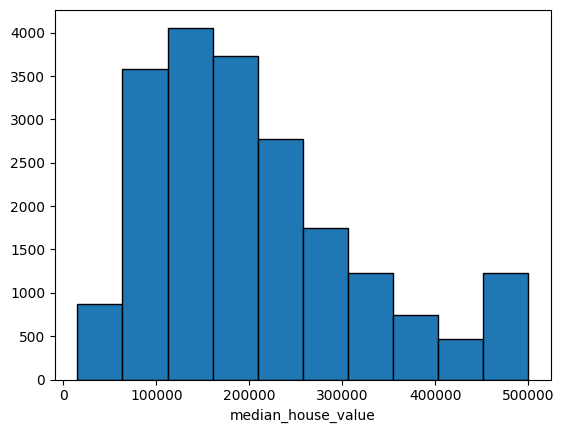

In [16]:
plt.hist(df.values[:,8], histtype='bar', ec='black')
plt.xlabel(df.columns[8])

#### Correlación

Para poder realizar un estudio de la correlación entre variables, excluimos las variables de _ocean proximity_ puesto que no son numéricos.

In [17]:
df_num = df.loc[:, df.dtypes != object] # dejamos solo los valores numéricos
df_num

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  
0           322.0       126.0         8.3252            452600.0  
1          2401.0      1138.0         8.3014            358500.0  
2           496.0       177.0         7.2574            352100.0  
3           558.0       219.0         5.6431            341300.0  
4           565.0       259.0         3.8462            342200.0  
...           ...         ...            ...                 ...  
20635       845.0       330.0         1.5603             78100.0  
20636       356.0       114.0         2.5568             77100.0  
20637      1007.0       433.0         1.7000             92300.0  
20638       741.0       349.0         1.8672             84700.0  
20639      1387.0       530.0         2.3886             89400.0  

[20433 rows x 9 columns]

Con la función ofrecida por la libreria Pandas, calculamos la correlación entre pares de las variables que tenemos

In [18]:
corr = df_num.corr()
corr

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_median_age       -0.320451   -0.295787   -0.302768      -0.118278   
total_rooms               0.930380    0.857281    0.918992       0.197882   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907186       0.005087   
households                0.979728    0.907186    1.000000       0.013434   
median_income            -0.007723    0.005087    0.013434       1.000000   
median_house_value        0.049686   -0.025300    0.064894       0.688355   

                    median_house_value  
longitude                    -0.045398  
latitude                     -0.144638  
housing_median_age            0.106432  
total_rooms                   0.133294  
total_bedrooms                0.049686  
population                   -0.025300  
households                    0.064894  
median_income                 0.688355  
median_house_value            1.000000

Con los datos obtenidos, elegimos aquellos pares de datos con una fuerte correlación entre ellos. Primero determinamos que dos variables tienen fuerte correlación si su relación en valor absoluto era mayor a 0.6.

In [19]:
aux = []
for i in corr.index:
    for j in corr.columns:
        if i != j and (corr[i][j] < -0.6 or corr[i][j] > 0.6):
                if((i,j,corr[i][j]) not in aux and (j,i,corr[i][j]) not in aux): # eliminamos duplicados
                    aux.append((i, j, corr[i][j]))

print("Variables con fuerte ( > 0.6 o < -0.6 ) relación:")

aux


Variables con fuerte ( > 0.6 o < -0.6 ) relación:


[('longitude', 'latitude', -0.9246161131160101),
 ('total_rooms', 'total_bedrooms', 0.9303795046865031),
 ('total_rooms', 'population', 0.8572812510982867),
 ('total_rooms', 'households', 0.9189915343453182),
 ('total_bedrooms', 'population', 0.8777467431529311),
 ('total_bedrooms', 'households', 0.9797282708045709),
 ('population', 'households', 0.9071859001744995),
 ('median_income', 'median_house_value', 0.6883554753161126)]

Observamos que, si ajustamos el criterio de correlación al 0,9 en valor absoluto, tan solo perdemos un único par de valores.

In [20]:
aux_eq = []
for i in corr.index:
    for j in corr.columns:
        if i != j and (abs(corr[i][j]) > 0.9):
                if((i,j,corr[i][j]) not in aux_eq and (j,i,corr[i][j]) not in aux_eq): # eliminamos duplicados
                    aux_eq.append((i, j, corr[i][j]))

print("Variables con fuerte ( > 0.9 o < -0.9 ) relación:")

aux_eq

Variables con fuerte ( > 0.9 o < -0.9 ) relación:


[('longitude', 'latitude', -0.9246161131160101),
 ('total_rooms', 'total_bedrooms', 0.9303795046865031),
 ('total_rooms', 'households', 0.9189915343453182),
 ('total_bedrooms', 'households', 0.9797282708045709),
 ('population', 'households', 0.9071859001744995)]

Podemos ver que estas variables evolucionan casi de la misma manera al cambiar valores.

In [21]:
aux_inv = []
for i in corr.index:
    for j in corr.columns:
        if i != j and (corr[i][j] < 0.6 or corr[i][j] > -0.6):
                if((i,j,corr[i][j]) not in aux_inv and (j,i,corr[i][j]) not in aux_inv): # eliminamos duplicados
                    aux_inv.append((i, j, corr[i][j]))

print("Variables con baja ( < 0.6 o > -0.6 ) relación:")

aux_inv

Variables con baja ( < 0.6 o > -0.6 ) relación:


[('longitude', 'latitude', -0.9246161131160101),
 ('longitude', 'housing_median_age', -0.10935654863027307),
 ('longitude', 'total_rooms', 0.0454801674218395),
 ('longitude', 'total_bedrooms', 0.06960802175408133),
 ('longitude', 'population', 0.10027030094083503),
 ('longitude', 'households', 0.056512772430637834),
 ('longitude', 'median_income', -0.015550150379729375),
 ('longitude', 'median_house_value', -0.04539821933443104),
 ('latitude', 'housing_median_age', 0.011899066824480742),
 ('latitude', 'total_rooms', -0.036666805610771125),
 ('latitude', 'total_bedrooms', -0.06698283471949555),
 ('latitude', 'population', -0.10899734357206249),
 ('latitude', 'households', -0.07177418526952299),
 ('latitude', 'median_income', -0.07962631913885085),
 ('latitude', 'median_house_value', -0.1446382115762039),
 ('housing_median_age', 'total_rooms', -0.36062829984244227),
 ('housing_median_age', 'total_bedrooms', -0.32045104175060396),
 ('housing_median_age', 'population', -0.2957872971044803)

Concluimos que las columnas con importantes relaciones son:

In [22]:
important_columns= []
for (i,j,corr) in aux:
    important_columns.append(i) if i not in important_columns else None
    important_columns.append(j) if j not in important_columns else None

important_columns

['longitude',
 'latitude',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

Construimos ahora los gráficos que representan las relaciones entre los distintos pares de variables. Para que nos salgam gráficos coherentes, necesitamos normalizar los datos para que estén en la misma escala y sin unidad. El criterio de normalización será el de normalización estándar.

array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='latitude'>,
        <Axes: xlabel='population', ylabel='latitude'>,
        <Axes: xlabel='households', ylabel='latitude'>,
        <Axes: xlabel='median_income', ylabel='latitude'>,
    

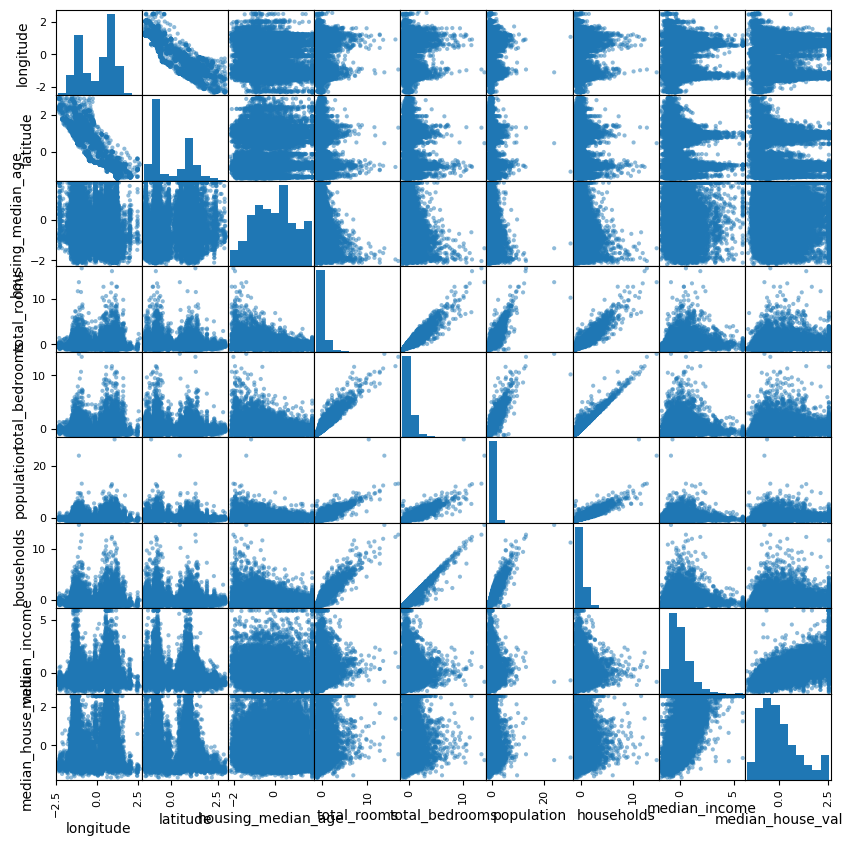

In [23]:
import pandas.plotting as pd_plot
import matplotlib
%matplotlib inline

# version casera del pairplot
normalized_df=(df_num-df_num.mean())/df_num.std()
# usamos la normalizada porque nos interesa la distribución de los datos pero los números grandes hacen que las tags sean poco legibles
pd_plot.scatter_matrix(normalized_df, figsize=(10,10))


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [24]:
df_cat = df.loc[:, df.dtypes == object] # dejamos solo los valores categóricos
df_cat

ocean_proximity
0            NEAR BAY
1            NEAR BAY
2            NEAR BAY
3            NEAR BAY
4            NEAR BAY
...               ...
20635          INLAND
20636          INLAND
20637          INLAND
20638          INLAND
20639          INLAND

[20433 rows x 1 columns]

Para realizar un análisis de la distribución de frecuencias, construimos un histograma de la variable _ocean proximity_

(array([2.270e+03, 0.000e+00, 9.034e+03, 0.000e+00, 0.000e+00, 6.496e+03,
        0.000e+00, 2.628e+03, 0.000e+00, 5.000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

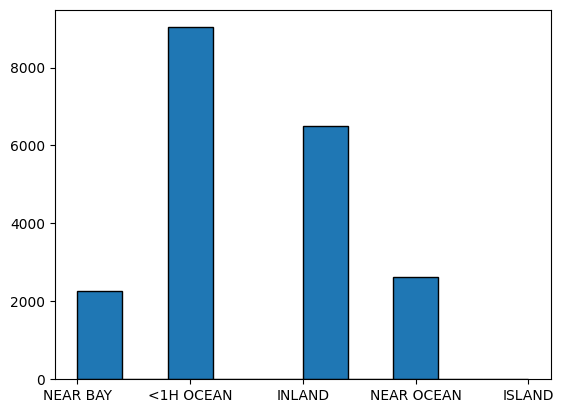

In [25]:
plt.clf()
plt.hist(df_cat['ocean_proximity'], histtype='bar', ec='black', align='mid')

In [26]:
island_count = df_cat['ocean_proximity'].value_counts()
island_count

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

Hemos tenido que hacer un conteo fuera del gráfico porque parecía que no había viviendas en islas, pero resulta que había 5. Teniendo en cuenta lo visto al analizar las coordenadas de las viviendas en el apartado anterior y viendo el mapa de California, tiene sentido que la mayoría de viviendas estén relativamente cerca del océano y que haya tan pocas viviendas en islas.

In [27]:
df_simplificado = df.copy()
df_simplificado

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20433 rows x 10 columns]

Intentamos realizar una numerización de los datos categóricos de dicha variable.

In [28]:
dict_transform = {'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}
df_simplificado['ocean_proximity'] = df_simplificado['ocean_proximity'].transform(lambda x: dict_transform[x])
df_simplificado

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
20635                2  
20636                2  
20637                2  
20638                2  
20639                2  

[20433 rows x 10 columns]

Asumiendo que podríamos denotar algún tipo de correlación fuerte con alguna de las variables numéricas

In [29]:
corr_simp = df_simplificado.corr()
corr_simp

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   
ocean_proximity      0.181198 -0.067980           -0.206178     0.015917   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_median_age       -0.320451   -0.295787   -0.302768      -0.118278   
total_rooms               0.930380    0.857281    0.918992       0.197882   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907186       0.005087   
households                0.979728    0.907186    1.000000       0.013434   
median_income            -0.007723    0.005087    0.013434       1.000000   
median_house_value        0.049686   -0.025300    0.064894       0.688355   
ocean_proximity           0.004081   -0.007061   -0.015561      -0.129415   

                    median_house_value  ocean_proximity  
longitude                    -0.045398         0.181198  
latitude                     -0.144638        -0.067980  
housing_median_age            0.106432        -0.206178  
total_rooms                   0.133294         0.015917  
total_bedrooms                0.049686         0.004081  
population                   -0.025300        -0.007061  
households                    0.064894        -0.015561  
median_income                 0.688355        -0.129415  
median_house_value            1.000000        -0.212014  
ocean_proximity              -0.212014         1.000000

Podemos ver que la correlación de la variable _ocean\_proximity_ con otras variables es realmente baja, siendo la máxima -0.212. Entoces no podemos realizar un buen análisis al respecto.

## 3) Preprocesar los datos

Para realizar el clustering puedes decidir quedarte con un subconjunto de las variables. Justifica la respuesta de tu decisión.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [30]:
columnas_no_importantes = list(set(df_num.columns) - set(important_columns))


columnas_no_importantes

['housing_median_age']

In [31]:
df_procesado = df.copy().drop(columnas_no_importantes + ['ocean_proximity'], axis=1)
df_procesado

longitude  latitude  total_rooms  total_bedrooms  population  \
0        -122.23     37.88        880.0           129.0       322.0   
1        -122.22     37.86       7099.0          1106.0      2401.0   
2        -122.24     37.85       1467.0           190.0       496.0   
3        -122.25     37.85       1274.0           235.0       558.0   
4        -122.25     37.85       1627.0           280.0       565.0   
...          ...       ...          ...             ...         ...   
20635    -121.09     39.48       1665.0           374.0       845.0   
20636    -121.21     39.49        697.0           150.0       356.0   
20637    -121.22     39.43       2254.0           485.0      1007.0   
20638    -121.32     39.43       1860.0           409.0       741.0   
20639    -121.24     39.37       2785.0           616.0      1387.0   

       households  median_income  median_house_value  
0           126.0         8.3252            452600.0  
1          1138.0         8.3014            358500.0  
2           177.0         7.2574            352100.0  
3           219.0         5.6431            341300.0  
4           259.0         3.8462            342200.0  
...           ...            ...                 ...  
20635       330.0         1.5603             78100.0  
20636       114.0         2.5568             77100.0  
20637       433.0         1.7000             92300.0  
20638       349.0         1.8672             84700.0  
20639       530.0         2.3886             89400.0  

[20433 rows x 8 columns]

In [32]:
from sklearn.preprocessing import MinMaxScaler
#escalamos los datos
data_scaled = MinMaxScaler().fit_transform(df_procesado)

df_scaled = pd.DataFrame(data=data_scaled, index=df_procesado.index, columns=df_procesado.columns)

df_scaled.head()

longitude  latitude  total_rooms  total_bedrooms  population  households  \
0   0.211155  0.567481     0.022331        0.019863    0.008941    0.020556   
1   0.212151  0.565356     0.180503        0.171477    0.067210    0.186976   
2   0.210159  0.564293     0.037260        0.029330    0.013818    0.028943   
3   0.209163  0.564293     0.032352        0.036313    0.015555    0.035849   
4   0.209163  0.564293     0.041330        0.043296    0.015752    0.042427   

   median_income  median_house_value  
0       0.539668            0.902266  
1       0.538027            0.708247  
2       0.466028            0.695051  
3       0.354699            0.672783  
4       0.230776            0.674638

Realizamos una normalización de los datos

In [33]:
from sklearn.preprocessing import StandardScaler
#estandarizamos los datos
data_standard = StandardScaler().fit_transform(df_procesado)

# Fase de transformación
df_standard = pd.DataFrame(
    data=data_standard, index=df_procesado.index, columns=df_procesado.columns)

df_standard.head()

longitude  latitude  total_rooms  total_bedrooms  population  households  \
0  -1.327314  1.051717    -0.803813       -0.970325   -0.973320   -0.976833   
1  -1.322323  1.042355     2.042130        1.348276    0.861339    1.670373   
2  -1.332305  1.037674    -0.535189       -0.825561   -0.819769   -0.843427   
3  -1.337296  1.037674    -0.623510       -0.718768   -0.765056   -0.733562   
4  -1.337296  1.037674    -0.461970       -0.611974   -0.758879   -0.628930   

   median_income  median_house_value  
0       2.345163            2.128819  
1       2.332632            1.313626  
2       1.782939            1.258183  
3       0.932970            1.164622  
4      -0.013143            1.172418

Finalmente decidimos usar el escalado para todo el dataset por su uniformidad de valores

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula el índice davies_boulding en función del número de clusters.

In [34]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [35]:
RANDOM_STATE = 333

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

K_MAX = 11
score = np.zeros(K_MAX - 2)
davies_boulding_non_aglomerative = np.zeros(K_MAX -2)
silhouette = np.zeros(K_MAX - 2)

for k in range(2, K_MAX):
    km = KMeans(init="random", n_clusters=k, random_state=RANDOM_STATE)
    km.fit(df_scaled)

    score[k-2] = -1*km.score(df_scaled)
    davies_boulding_non_aglomerative[k-2] = davies_bouldin_score(df_scaled, km.labels_)
    silhouette[k-2] = silhouette_score(df_scaled, km.labels_)

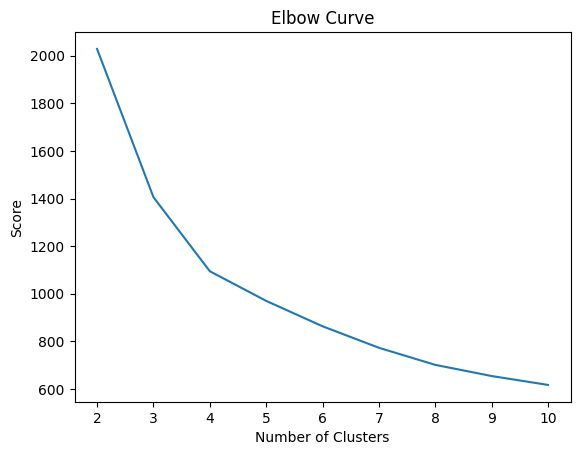

In [37]:
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Observamos que el primer cambio de tendencia está en 3 clústers

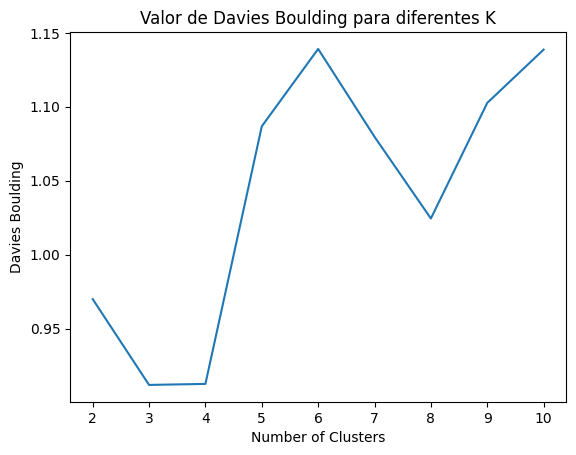

In [38]:
plt.plot(range(2, K_MAX), davies_boulding_non_aglomerative)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding')
plt.title('Valor de Davies Boulding para diferentes K')
plt.show()

El criterio de Davies Boulding nos indica que los valores mínimos de calidad se situan en 3 y 4 clústers, siendo 3 el mínimo de ellos.

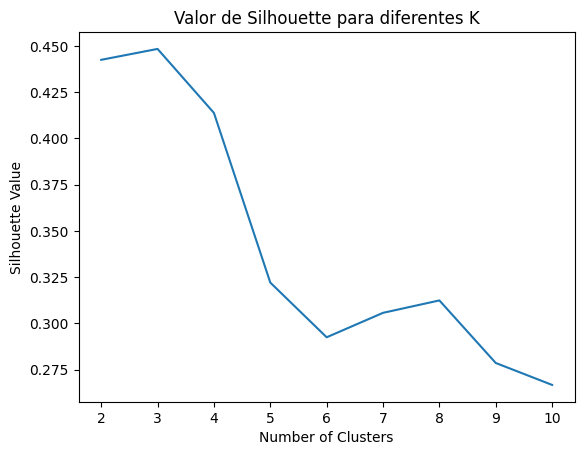

In [39]:
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.title('Valor de Silhouette para diferentes K')
plt.show()

Valor Silhouette determina el primer cambio de tendencia en 3 clústers

Todas las gráficas nos indican que el valor deseado es 3 clusters

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema.

Realiza una visualización teniendo en cuenta la latitud y la longitud e intenta darle una interpretación.

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

Realizamos una asignación de etiquetas de clústers a cada dato de nuestra muestra, puesto que habíamos escalado los datos.

In [40]:
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
km.fit(df_scaled)

df = df.assign(cluster=pd.Series(data=km.labels_, index=df.index))
df.sort_values(by="cluster").loc[:, ['cluster']]

cluster
0            0
8672         0
8671         0
8670         0
8669         0
...        ...
12740        2
12739        2
12738        2
12768        2
20639        2

[20433 rows x 1 columns]

#### Cluster 1

In [41]:
clusterZero = df[df["cluster"] == 0]
clusterZero

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
89       -122.27     37.80                52.0        249.0            78.0   
120      -122.24     37.83                41.0       2576.0           406.0   
...          ...       ...                 ...          ...             ...   
20494    -118.71     34.29                24.0       2983.0           406.0   
20501    -118.71     34.30                20.0       1586.0           187.0   
20503    -118.75     34.33                27.0        534.0            85.0   
20504    -118.73     34.29                11.0       5451.0           736.0   
20506    -118.73     34.29                 8.0       4983.0           754.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
89          396.0        85.0         1.2434            500001.0   
120         794.0       376.0         5.9560            366100.0   
...           ...         ...            ...                 ...   
20494      1203.0       381.0         6.3236            302000.0   
20501       699.0       209.0         6.5483            335000.0   
20503       243.0        77.0         8.2787            330000.0   
20504      2526.0       752.0         7.3550            343900.0   
20506      2510.0       725.0         6.9454            276500.0   

      ocean_proximity  cluster  
0            NEAR BAY        0  
1            NEAR BAY        0  
2            NEAR BAY        0  
89           NEAR BAY        0  
120          NEAR BAY        0  
...               ...      ...  
20494       <1H OCEAN        0  
20501       <1H OCEAN        0  
20503       <1H OCEAN        0  
20504       <1H OCEAN        0  
20506       <1H OCEAN        0  

[3228 rows x 11 columns]

In [42]:
statsClusterZero = clusterZero.describe()
statsClusterZero

longitude     latitude  housing_median_age   total_rooms  \
count  3228.000000  3228.000000         3228.000000   3228.000000   
mean   -119.614089    35.175688           30.675651   3098.085812   
std       1.910491     1.759615           13.284233   2524.478141   
min    -122.710000    32.630000            2.000000      8.000000   
25%    -122.020000    33.890000           20.000000   1759.750000   
50%    -118.460000    34.150000           31.000000   2524.000000   
75%    -118.160000    37.360000           40.000000   3646.000000   
max    -116.260000    39.190000           52.000000  37937.000000   

       total_bedrooms    population   households  median_income  \
count     3228.000000   3228.000000  3228.000000    3228.000000   
mean       537.837670   1283.128872   505.060099       6.390231   
std        427.836216   1073.533140   392.089738       2.495813   
min          1.000000      8.000000     1.000000       0.499900   
25%        295.000000    721.000000   282.000000       4.617375   
50%        432.000000   1038.500000   410.000000       6.127450   
75%        648.250000   1525.000000   609.250000       7.671775   
max       5471.000000  16122.000000  5189.000000      15.000100   

       median_house_value  cluster  
count         3228.000000   3228.0  
mean        417409.466543      0.0  
std          69452.036392      0.0  
min         239100.000000      0.0  
25%         353975.000000      0.0  
50%         412500.000000      0.0  
75%         500001.000000      0.0  
max         500001.000000      0.0

#### Cluster 2

In [43]:
clusterOne = df[df["cluster"] == 1]
clusterOne

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2665     -115.52     33.12                38.0       1327.0           262.0   
2666     -115.52     33.13                18.0       1109.0           283.0   
2667     -115.51     33.12                21.0       1024.0           218.0   
2668     -115.46     33.19                33.0       1234.0           373.0   
2669     -115.51     33.24                32.0       1995.0           523.0   
...          ...       ...                 ...          ...             ...   
20498    -118.70     34.29                25.0       1678.0           252.0   
20499    -118.71     34.30                23.0       1983.0           280.0   
20500    -118.70     34.30                27.0       1527.0           220.0   
20502    -118.68     34.33                45.0        121.0            25.0   
20505    -118.72     34.29                22.0       3266.0           529.0   

       population  households  median_income  median_house_value  \
2665        784.0       231.0         1.8793             60800.0   
2666       1006.0       253.0         2.1630             53400.0   
2667        890.0       232.0         2.1010             46700.0   
2668        777.0       298.0         1.0000             40000.0   
2669       1069.0       410.0         1.6552             43300.0   
...           ...         ...            ...                 ...   
20498       862.0       268.0         6.1834            229800.0   
20499       978.0       287.0         6.3199            236700.0   
20500       756.0       226.0         6.1825            227000.0   
20502        67.0        27.0         2.9821            325000.0   
20505      1595.0       494.0         6.0368            248000.0   

      ocean_proximity  cluster  
2665           INLAND        1  
2666           INLAND        1  
2667           INLAND        1  
2668           INLAND        1  
2669           INLAND        1  
...               ...      ...  
20498       <1H OCEAN        1  
20499       <1H OCEAN        1  
20500       <1H OCEAN        1  
20502       <1H OCEAN        1  
20505       <1H OCEAN        1  

[9608 rows x 11 columns]

In [44]:
statsClusterOne = clusterOne.describe()
statsClusterOne

longitude     latitude  housing_median_age   total_rooms  \
count  9608.000000  9608.000000         9608.000000   9608.000000   
mean   -117.938127    33.914999           28.214925   2606.274251   
std       0.767682     0.628082           11.804721   2228.802544   
min    -120.700000    32.540000            1.000000      2.000000   
25%    -118.290000    33.770000           19.000000   1414.750000   
50%    -118.050000    33.970000           29.000000   2054.000000   
75%    -117.370000    34.130000           36.000000   3065.250000   
max    -114.310000    36.950000           52.000000  32054.000000   

       total_bedrooms    population   households  median_income  \
count     9608.000000   9608.000000  9608.000000    9608.000000   
mean       564.847315   1573.637073   522.862823       3.416182   
std        448.267350   1201.428381   397.867578       1.295310   
min          2.000000      3.000000     2.000000       0.499900   
25%        308.000000    882.750000   294.000000       2.424600   
50%        452.000000   1292.000000   426.000000       3.271250   
75%        671.000000   1896.000000   623.000000       4.236100   
max       5290.000000  35682.000000  5050.000000      12.538100   

       median_house_value  cluster  
count         9608.000000   9608.0  
mean        172376.207119      1.0  
std          63787.041040      0.0  
min          14999.000000      1.0  
25%         125000.000000      1.0  
50%         168300.000000      1.0  
75%         218800.000000      1.0  
max         366700.000000      1.0

#### Cluster 3

In [45]:
clusterTwo = df[df["cluster"] == 2]
clusterTwo

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
5           413.0       193.0         4.0368            269700.0   
6          1094.0       514.0         3.6591            299200.0   
7          1157.0       647.0         3.1200            241400.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  cluster  
3            NEAR BAY        2  
4            NEAR BAY        2  
5            NEAR BAY        2  
6            NEAR BAY        2  
7            NEAR BAY        2  
...               ...      ...  
20635          INLAND        2  
20636          INLAND        2  
20637          INLAND        2  
20638          INLAND        2  
20639          INLAND        2  

[7597 rows x 11 columns]

In [46]:
statsClusterTwo = clusterTwo.describe()
statsClusterTwo

longitude     latitude  housing_median_age   total_rooms  \
count  7597.000000  7597.000000         7597.000000   7597.000000   
mean   -121.616965    38.000682           28.294063   2478.608266   
std       0.970609     1.016474           13.159036   1933.467781   
min    -124.350000    35.270000            1.000000     12.000000   
25%    -122.260000    37.390000           17.000000   1401.000000   
50%    -121.860000    37.820000           27.000000   2060.000000   
75%    -121.200000    38.530000           38.000000   3018.000000   
max    -118.180000    41.950000           52.000000  39320.000000   

       total_bedrooms    population   households  median_income  \
count     7597.000000   7597.000000  7597.000000    7597.000000   
mean       503.766750   1297.156246   467.411347       3.376214   
std        378.990095   1042.192826   354.789309       1.315763   
min          3.000000      9.000000     2.000000       0.499900   
25%        284.000000    716.000000   264.000000       2.398000   
50%        417.000000   1071.000000   387.000000       3.205200   
75%        614.000000   1586.000000   568.000000       4.208300   
max       6445.000000  28566.000000  6082.000000      15.000100   

       median_house_value  cluster  
count         7597.000000   7597.0  
mean        161020.428853      2.0  
std          78761.370380      0.0  
min          14999.000000      2.0  
25%          94300.000000      2.0  
50%         145900.000000      2.0  
75%         221400.000000      2.0  
max         380000.000000      2.0

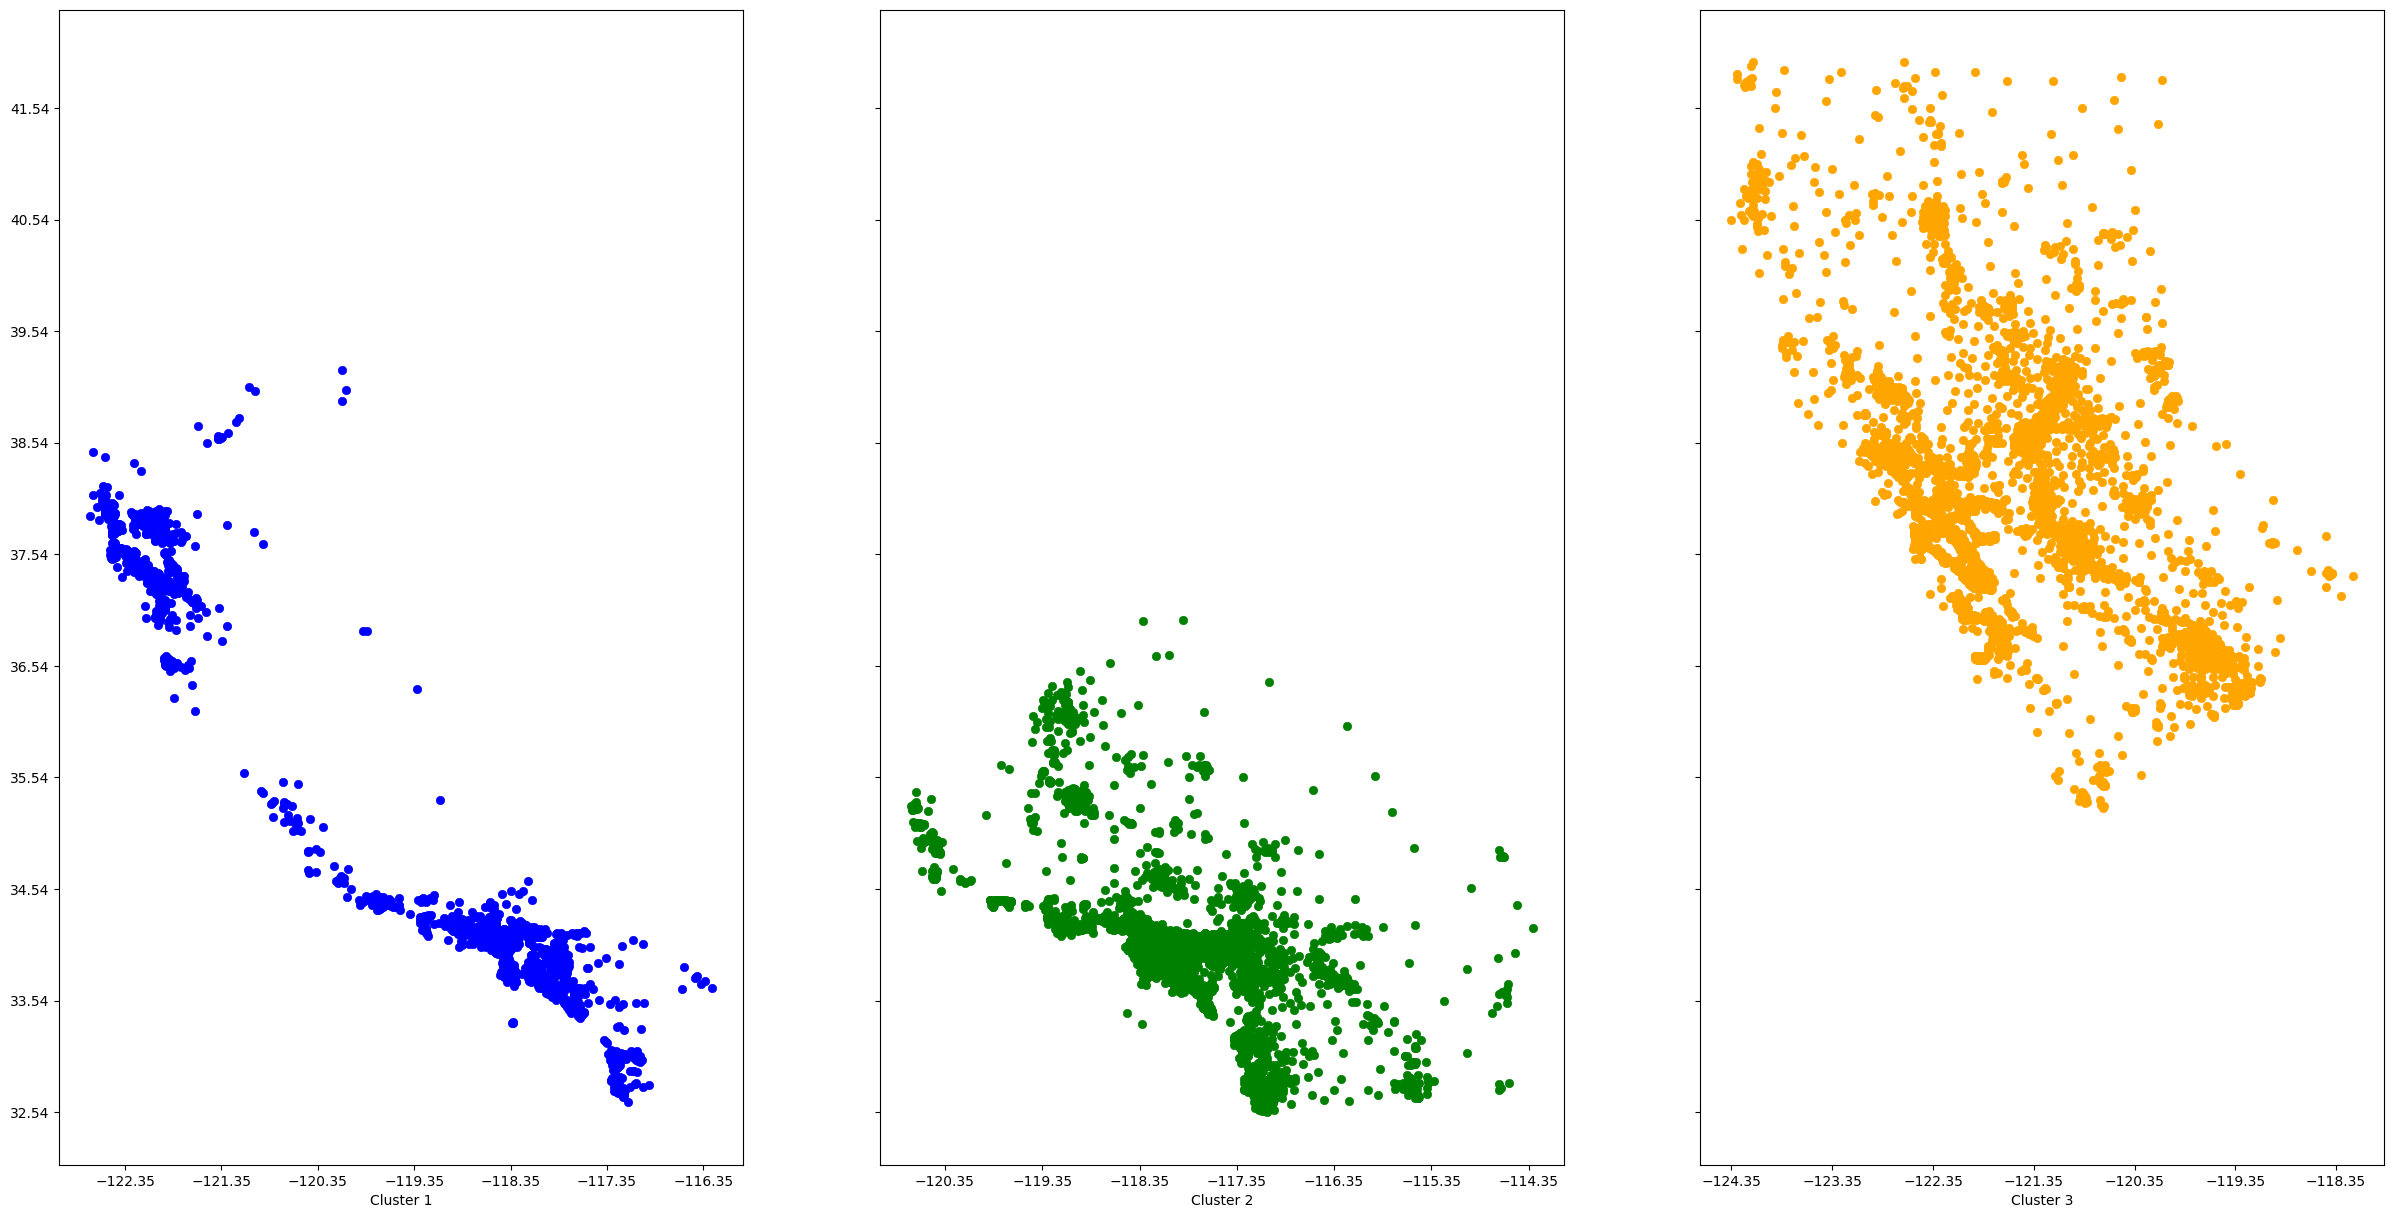

In [47]:
clusters = [clusterZero, clusterOne, clusterTwo]
coloresVarios = ["blue", "green", "orange"]
minimaLongitud, maximaLongitud = (np.min(df.values[:,0]), np.max(df.values[:,0]))
minimaLatitud, maximaLatitud = (np.min(df.values[:, 1]), np.max(df.values[:,1]))

# Subplots de los clusters sobre coordenadass geograficas
(fig, ax) = plt.subplots(1, 3, sharey=True, figsize=(30,15), )
plt.setp(ax, xticks=np.arange(minimaLongitud, maximaLongitud), yticks=np.arange(minimaLatitud, maximaLatitud))

for i in range(len(ax)) :
    ax[i].scatter(clusters[i].values[:,0], clusters[i].values[:,1], linewidths=0.5, c=coloresVarios[i])
    ax[i].set_xlabel(str.format("Cluster {value}", value=i+1))

plt.show()


##### Analisis de los clústeres obtenidos

Hemos decidido mostrar las coordenadas de los inmuebles asociados a los distintos clústeres porque será la mejor manera de dar contexto a los datos obtenidos, ya que podemos identificar poblaciones reales de manera aproximada en los gráficos.

-   **Clúster 1**: podemos observar una gran presencia de inmuebles en la zona costera de California, pero lo más destacable sin duda es su ubicación. Identificamos inmuebles en el centro y costa de:

    - Los Ángeles.
    - San Francisco.
    - San José.
    - Oakland.
    - San Diego.

    Esta información no es suficiente como para diferenciar exclusivamente los clústeres, dado que este clúster y el segundo comparten localidades para gran parte de sus datos. Las viviendas del clúster 1 también destacan por tener de media un gran número de salas por inmueble, por tener un valor en mercado medio que casi triplica al resto de clústeres, y por que sus habitantes tienen de media el doble del poder adiquisitivo. Cabe destacar que tampoco la desviación estándar de los datos es la ideal, por el precio de los inmuebles ubicados en Los Ángeles. Respecto al resto de aspectos, todos los clústeres comparten estadísticas parecidas (Al menos, de diferencias que no consideramos relevantes).

-   **Clúster 2**: Algo muy claramente destacable a primera vista es que este clúster representa la parte sur de California. Hasta tal punto que se observa con bastante precisión la frontera precisa respecto al clúster 3. En terminos generales, parece presentar numerosos puntos en la zona de Los Ángeles y San Diego. Sin embargo, se ve una gran concetración a los alrededores de ambas ciudades. De hecho, dado el cierto grado de gentrificación presente en ambas ciudades, en realidad dichos inmuebles pertenecen a localidades periféricas a ambas ciudades (identificadas en el gran cúmulo de puntos en el mapa), como por ejemplo:

    - Thousand Oaks.
    - Santa Clarita.
    - San Bernardino.
    - Riverside.
    - Escondido.
    - Chula Vista.
    - Palm Springs.

    También vemos numerosos inmuebles dispersos cuanto más nos adentramos al interior del continente. Estos inmuebles están situados en pequeñas localidades rodeadas por parques nacionales en esta zona sur, la cual es la más árida del estado.
    Cercana a la frontera con el clúster 3, observamos un par de agrupaciones, equivalentes a:

    - Los Álamos, situada más al noroeste del clúster. Zona cercana a la costa, pero no lo suficiente para considerarla costera. A sus alrededores apenas se dislumbran inmuebles, debido a la presencia de parques naturales.

    - Bakersfield, situada al norte del cluster, frontera con el clúster 3.

    Como comentamos, este clúster tiene mucho en común con el tercer clúster y un alto contraste con el primero. Su agrupación está principalmente basada en un criterio de geolocalización y destaca por tener el mayor índice promedio de población. La explicación más lógica a esto viene dada por los altos precios de las viviendas encontradas en la parte sur del primer clúster. Dada la ubicación de dichas viviendas, resulta difícil el acceso de familias de un poder adquisitivo no tan alto. La "solución" encontrada fue irse a vivir a la periferia. Estas localidades con viviendas de menor coste han acabado superpobladas, dado que probablemente, estas poblaciones trabajarán en las grandes ciudades, las cuales, por consecuencia, necesitan de dicha demanda de trabajadores.

-   **Clúster 3**: Este clúster representa inmuebles de la parte norte de California. Aunque hasta cierto punto estén más dispersos que su contrapunto en el segundo clúster, hay una clara agrupación medianamente bien distribuida en el centro geográfico y parte del este del clúster. El este equivale a la periferia de las localidades englobadas alrededor de San Francisco, San José y Oakland, por ese efecto de gentrificación comentado en segundo clúster. Estas localidades son, entre otras:

    - Santa Cruz.
    - Walnut Creek.
    - Concord.
    - King City.
    - Gilroy.
    - Hollister.
    - Ulmar.
    
    Pero, la zona central, representa una zona más "rural". Esa agrupación central medianamente dispersa esta ubicada en el Valle Central de California, el motor agrícola de este estado. En esta zona se identifican inmuebles de localidades como por ejemplo:

    - Fresno.
    - Stockton.
    - Modesto.
    - Merced.
    - Mariposa.
    - Los Baños.
    - Firebaugh.
    - Chowchilla.
    - Madera.
    - Visalia.
    - Kettleman City.
    - Coalinga.

    Esta zona al ser más rural, era esperable que tuviese los valores medios de inmueble más bajos. Aun así, no están tan alejados de aquellos de los otros clústeres debido las poblaciones perífericas de grandes ciudades, las cuáles aumentan considerablemente el valor. Este hecho es fácilmente verificable dado que para dicho aspecto posee el valor más alto para su desviación estándar.

    Respecto a los otros dos clústeres, destaca en que tiene el valor de household más bajo. Esto respaldaría el hecho de ser una zona más rural, puesto que es menos común encontrarse edificioes de apartamentos tan grandes como los que se podría encontrar en Los Ángeles y su periferia. De hecho, es más probable encontrar viviendas unifamiliares.

    La zona oeste aparece con menos inmuebles dada la presencia de zonas montañosas y de varios parques nacionales.

    Como detalle, nos parece curioso destacar una pequeña agrupación al norte del valle, la cual equivale a la ciudad de Sacramento. Sacramento es la capital del estado y a pesar de dicho título es una ciudad significativamente más pequeña al resto de ciudades relevantes del estado.

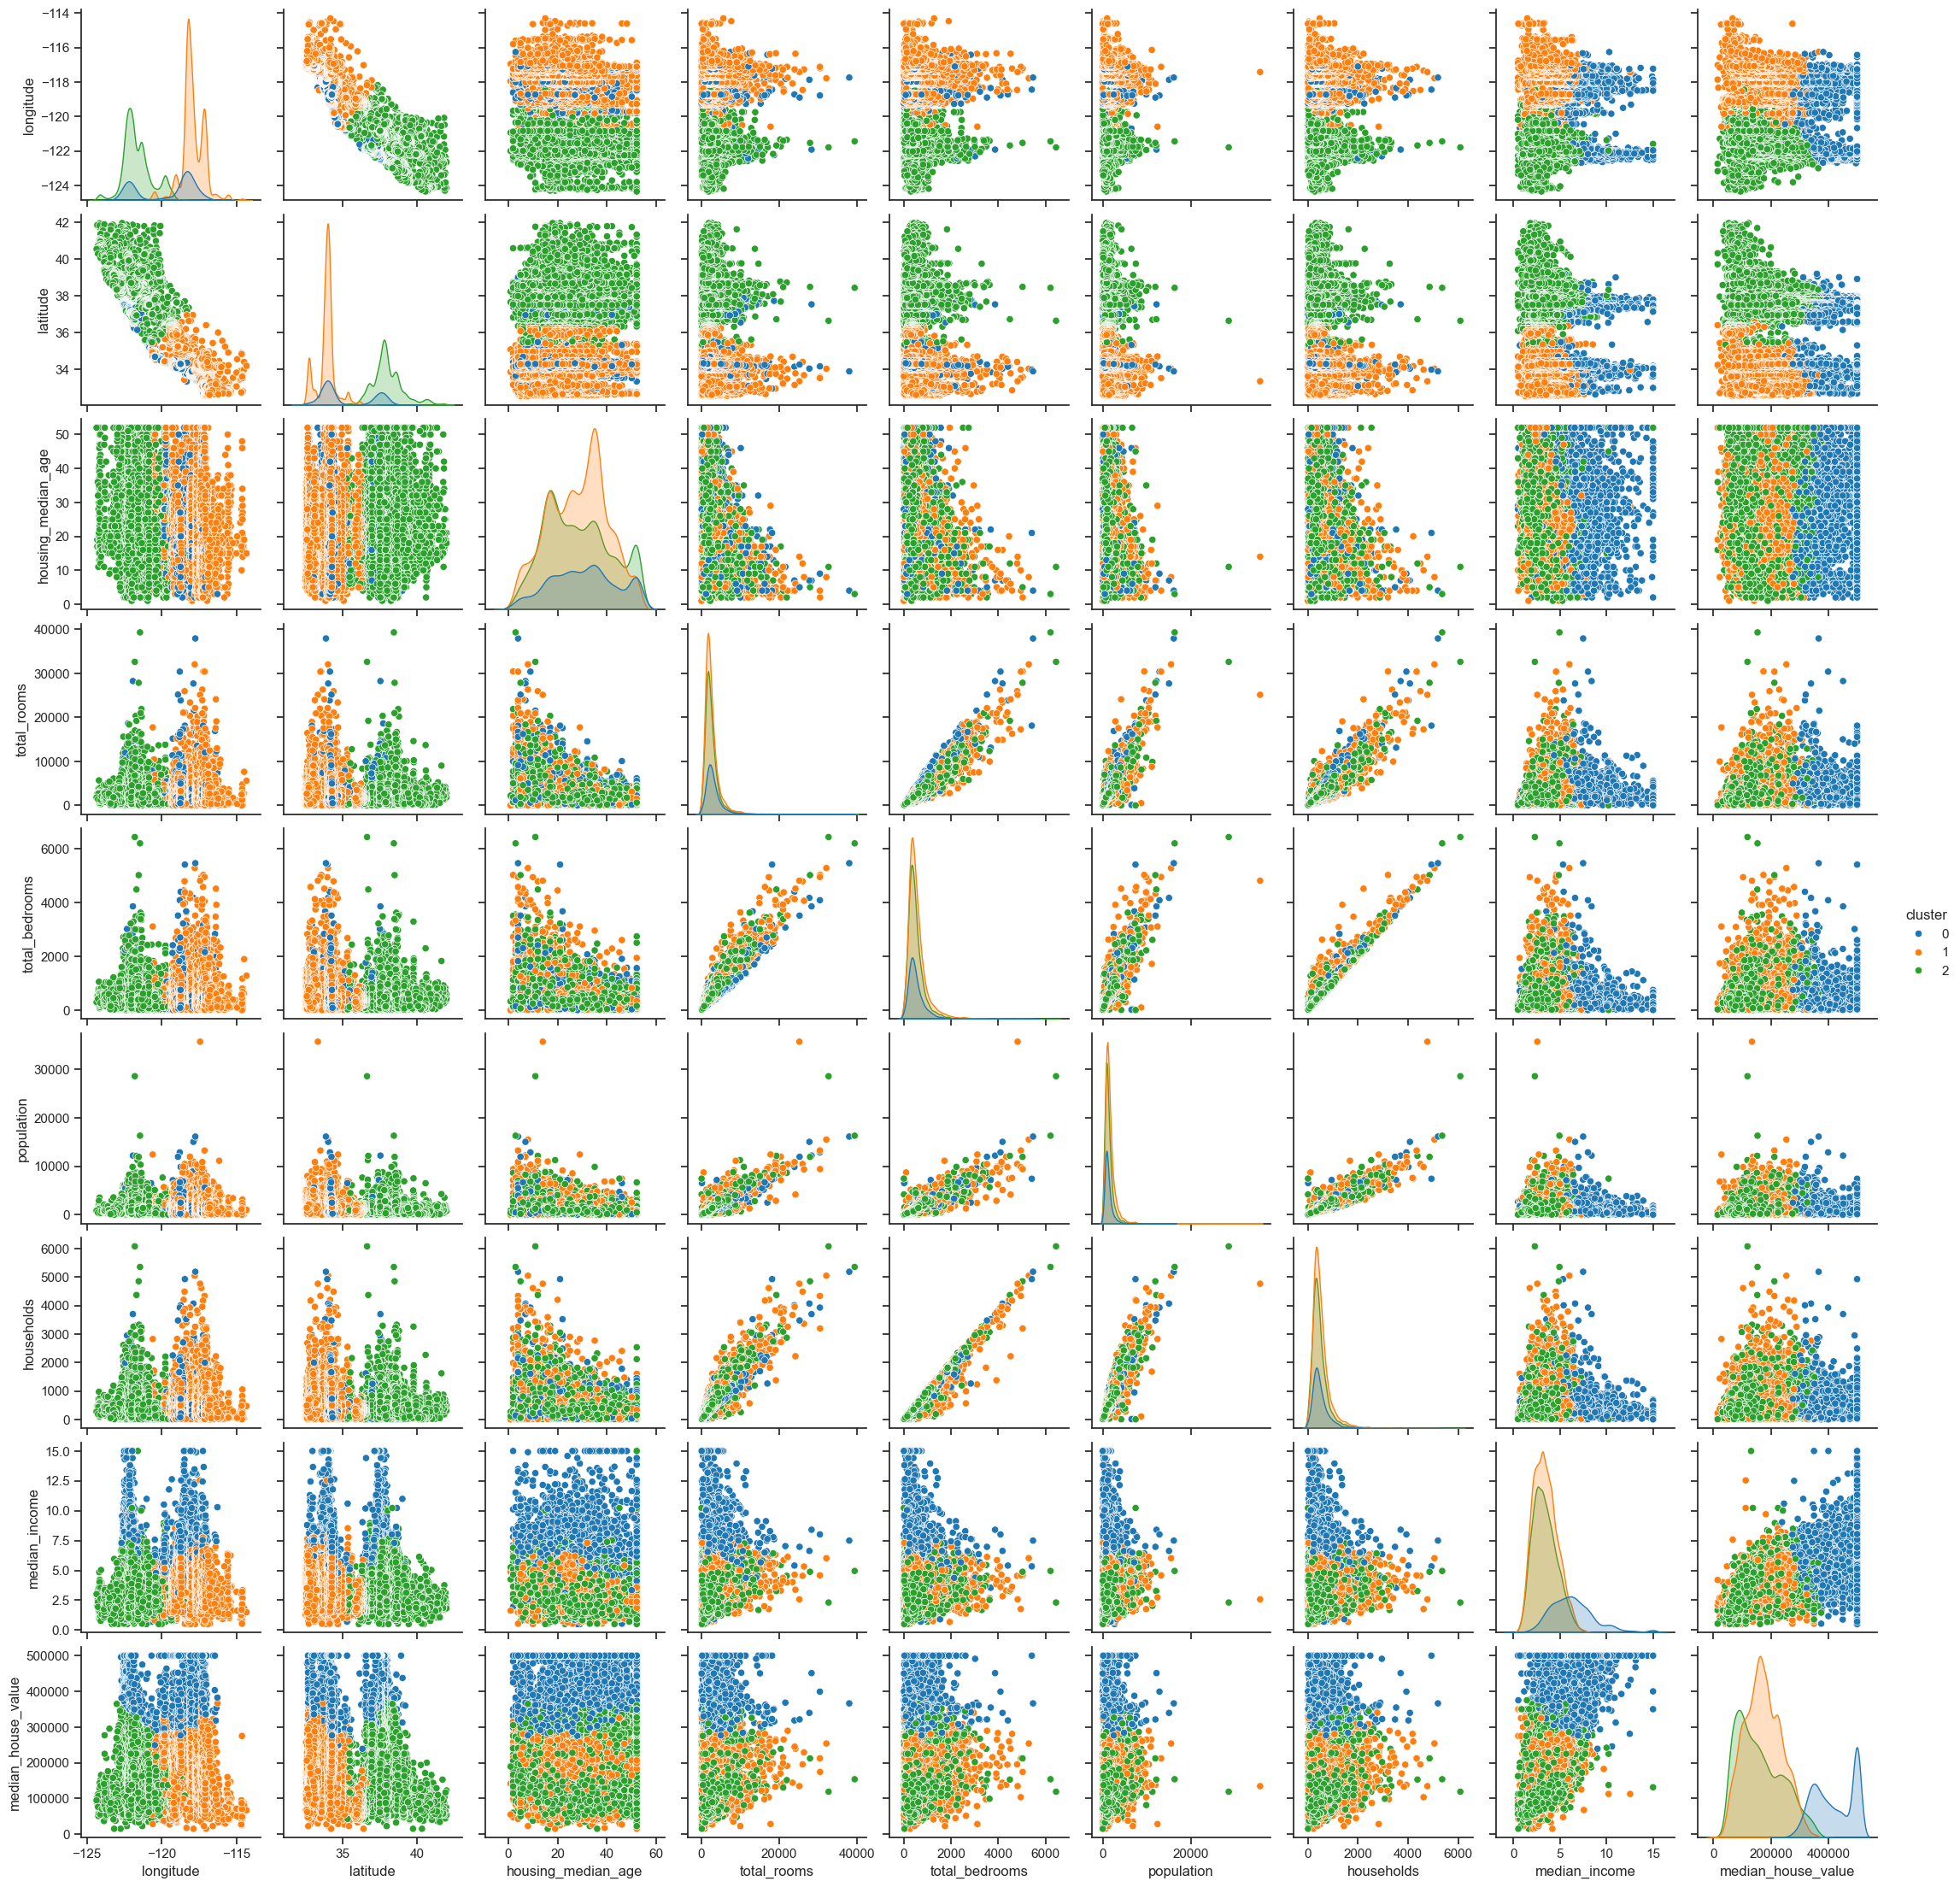

In [48]:
import seaborn as sns

sns.set_theme(style="ticks")
sns.pairplot(df, hue = "cluster", palette="tab10")

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



In [49]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Crear una instancia del agrupador jerárquico aglomerativo
K_MAX = 11
score = np.zeros(K_MAX - 2)
davies_boulding = np.zeros(K_MAX -2)
silhouette = np.zeros(K_MAX - 2)

for k in range(2, K_MAX): 
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    ag.fit(df_scaled)
    
    # score[k-2] = -1*ag.score(df_scaled)
    davies_boulding[k-2] = davies_bouldin_score(df_scaled, ag.labels_)
    silhouette[k-2] = silhouette_score(df_scaled, ag.labels_)

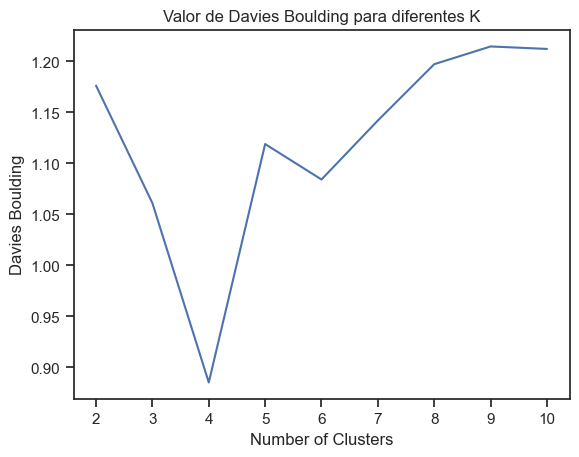

In [50]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding')
plt.title('Valor de Davies Boulding para diferentes K')
plt.show()


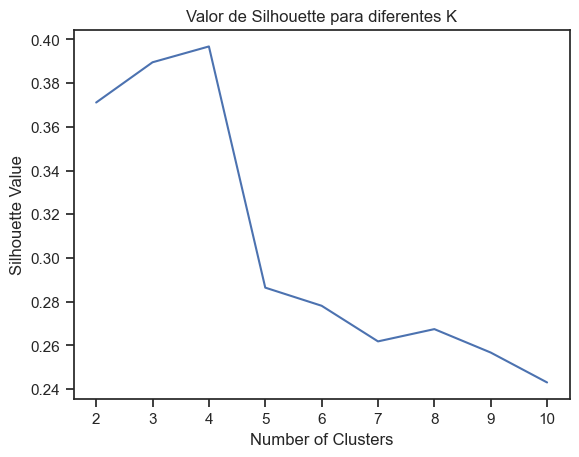

In [51]:
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.title('Valor de Silhouette para diferentes K')
plt.show()

El número óptimo sigue siendo 4 clusters, pero ahora parece que la gráfica de Davies Boulding está más inclinada a 4 que a 5, no como en el apartado anterior

Text(30, 10, '4 clusters')

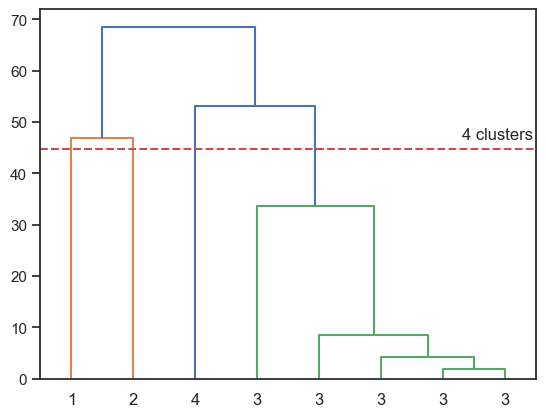

In [52]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
K = 4
d = pdist(df_scaled.T, metric='euclidean')

# Linkage hace el clustering jerárquico aglomerativo
Z = hierarchy.linkage(d, method='complete', metric='euclidean')
T = hierarchy.fcluster(Z, K, 'maxclust')
labels= list('' for i in range(len(df_scaled.columns)))
for i in range(len(df_scaled.columns)):
    labels[i] =str(T[i])

B = dendrogram(Z, labels=labels)

threshold = Z[-K + 1, 2] - 2
plt.axhline(y=threshold, color='r', linestyle='--')

plt.annotate(f'{K} clusters', xy=(67, threshold), xytext=(30, 10),
             textcoords='offset points', ha='center', va='center')
